<a href="https://colab.research.google.com/github/Vicodethrone/Tour-de-Py/blob/main/Day_13_Ph%E1%BA%A7n_m%E1%BB%81m_qu%E1%BA%A3n_l%C3%BD_chi_ti%C3%AAu_c%C3%B3_GUI_v%C3%A0_database_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Phần mềm quản lý chi tiêu

Theo dõi chi phí là quan trọng đối với tài chính của ngân sách cá nhân hoặc nghề nghiệp của bạn.

Bạn cần ghi chép lại các khoản chi tiêu hàng ngày và các khoản dự trữ của mình theo một định dạng thích hợp để có thể phân tích tất cả các khoản chi tiêu một cách hiệu quả và chính xác.

Làm thế nào về một ứng dụng làm tất cả những điều này làm việc cho bạn và bạn chỉ cần cung cấp thông tin?

Vì vậy, hiểu được tầm quan trọng của ứng dụng, chúng ta ở đây để cung cấp cho bạn một lời giải thích hay và cách triển khai tương tự.

Trình theo dõi chi phí là một dự án đơn giản được phát triển bằng python giúp chúng ta phân tích chi phí của mình bằng cách lưu trữ chúng dưới dạng bảng có hệ thống.

Chúng ta sẽ sử dụng tkinter cho GUI.

# Requirement
Để có thể làm tốt phần mềm này bạn cần nắm chắc kiến thức

*   Các khái niệm cơ bản python
*   Làm chủ thư viện Tkinter



Ngoài ra bạn cần cài thêm thư viện sqlite 3 (để thiết lập database trong máy, lưu trũ dữ liệu) và tkcalender (thư viện cho phép sử dụng Calender và DateEntry widgets của tkinter)

In [ ]:
Pip install tkcalendar
Pip install sqlite3

# Hàm khởi tạo init

Hàm khởi tạo này sẽ luôn tạo table ở trong database sqlite3 và với tương tác trong GUI thì dữ liệu sẽ được hiển thị ở trên đấy.

Để hiểu rõ hơn về init bạn hãy vào [đây](https://qastack.vn/programming/625083/what-init-and-self-do-on-python)

Để kết nối database ta cần các bước sau:

1. Import sqlite3

2. Tạo đối tượng kết nối
connectionObjn = db.connect(“expenseTracker.db”)

3. Tạo đối tượng con trỏ
curr = connectionObjn.cursor()

4. Thực hiện truy vấn querry bằng mySql

5. Commit


# Algorithm

Chúng ta sẽ làm theo các bước trên trong mọi chức năng yêu cầu tương tác với cơ sở dữ liệu. Ở đây chúng ta cần tạo một bảng nếu nó không tồn tại để câu lệnh truy vấn được viết tương ứng.

Chúng ta sẽ yêu cầu người dùng nhập ngày chi tiêu và sau đó lưu trữ cùng trong dateEntry.

Tên của người dùng và chi tiết chi phí như tiêu đề và số tiền đã chi tiêu được hỏi và lưu trữ trong Title và Expense tương ứng. Chúng tôi có một nút submit gọi phương thức SubmitExpense.

SubmitExpense: đọc dateEntry, Name, Title, và Expense và lưu trữ nó trong 'table' trong một "row"(hàng) mới. Ngoài ra, chúng ta sẽ lưu trữ từng "row" này trong cơ sở dữ liệu của mình bằng cách làm theo năm bước đã giải thích ở trên. Bây giờ, chúng ta sẽ hiển thị tất cả các chi phí dưới dạng bảng bằng cách sử dụng tiện ích Treeview của tkinter.

Cuối cùng, chúng ta có nút xem chi phí gọi phương thức viewexpense.

viewExpense: đọc mọi hàng bảng chi phí hiển thị trên cửa sổ tkinter.

# Output

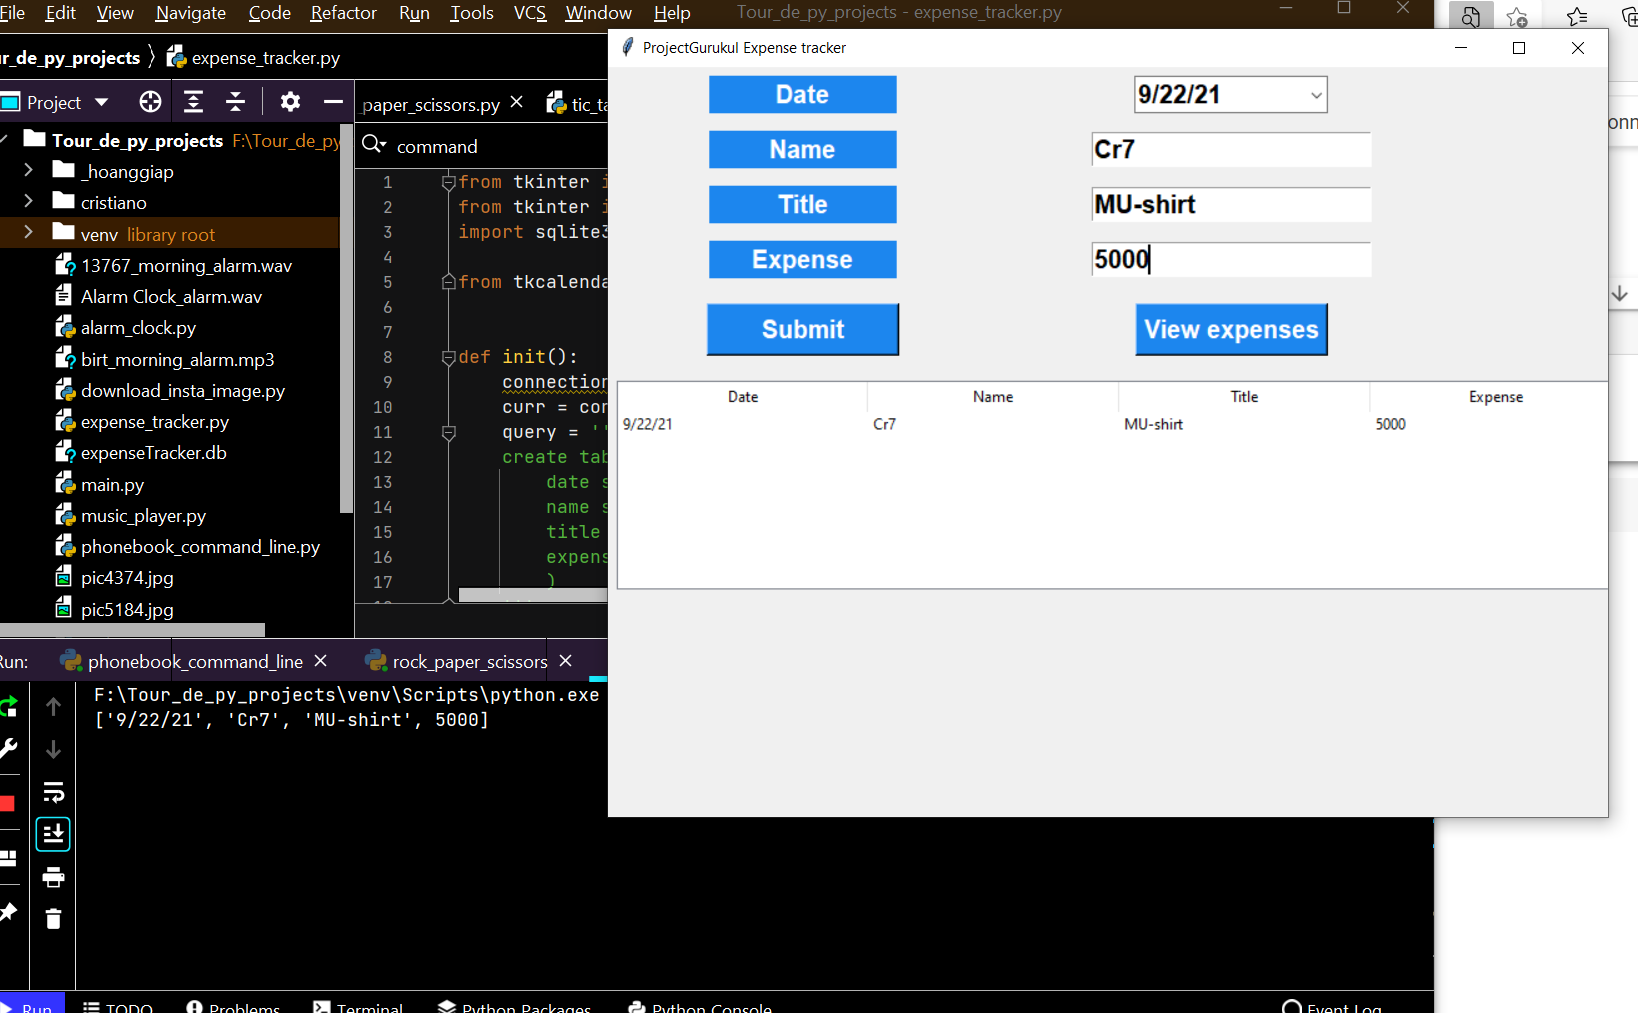

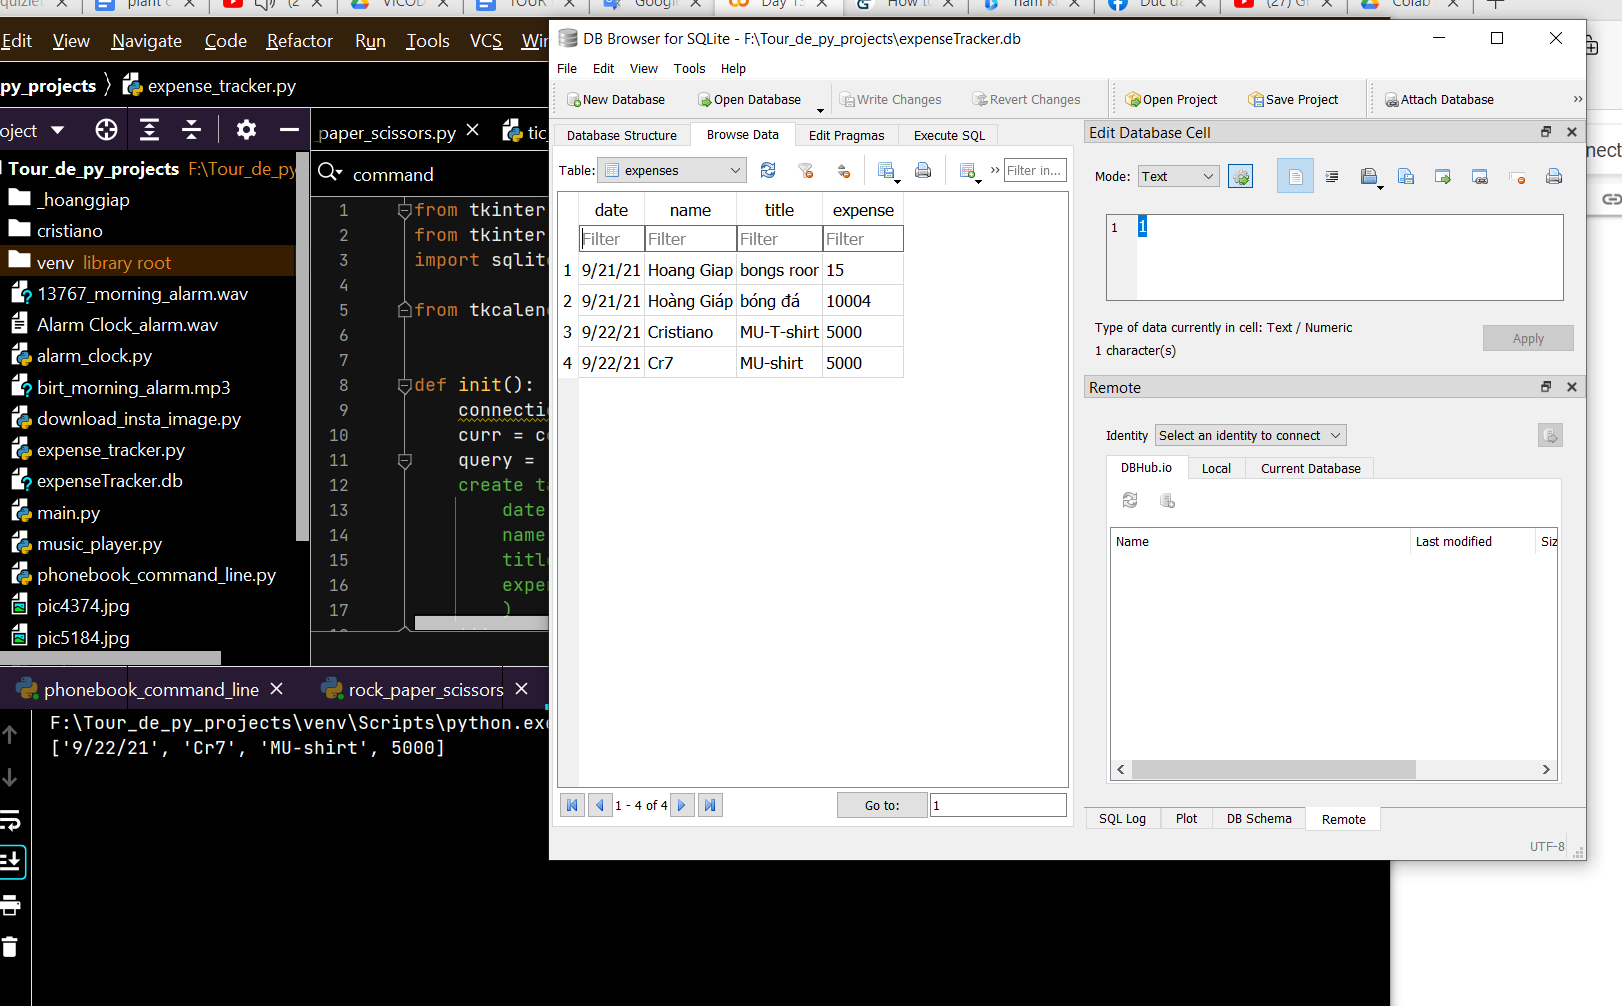

In [ ]:
#CODE
from tkinter import *
from tkinter import ttk
import sqlite3 as db

from tkcalendar import DateEntry


def init():
    connectionObjn = db.connect("expenseTracker.db")
    curr = connectionObjn.cursor()
    query = '''
    create table if not exists expenses (
        date string,
        name string,
        title string,
        expense number
        )
    '''
    curr.execute(query)
    connectionObjn.commit()


def submitexpense():
    values = [dateEntry.get(), Name.get(), Title.get(), Expense.get()]
    print(values)
    Etable.insert('', 'end', values=values)

    connectionObjn = db.connect("expenseTracker.db")
    curr = connectionObjn.cursor()
    query = '''
    INSERT INTO expenses VALUES 
    (?, ?, ?, ?)
    '''
    curr.execute(query, (dateEntry.get(), Name.get(), Title.get(), Expense.get()))
    connectionObjn.commit()


def viewexpense():
    connectionObjn = db.connect("expenseTracker.db")
    curr = connectionObjn.cursor()
    query = '''
     select * from expenses
    '''
    total = '''
    select sum(expense) from expenses
    '''
    curr.execute(query)
    rows = curr.fetchall()
    curr.execute(total)
    amount = curr.fetchall()[0]
    print(rows)
    print(amount)

    l = Label(root, text="Date\t  Name\t  Title\t  Expense", font=('arial', 15, 'bold'), bg="DodgerBlue2", fg="white")
    l.grid(row=6, column=0, padx=7, pady=7)

    st = ""
    for i in rows:
        for j in i:
            st += str(j) + '\t'
        st += '\n'
    print(st)
    l = Label(root, text=st, font=('arial', 12))
    l.grid(row=7, column=0, padx=7, pady=7)


init()
root = Tk()
root.title("ProjectGurukul Expense tracker")
root.geometry('800x600')

dateLabel = Label(root, text="Date", font=('arial', 15, 'bold'), bg="DodgerBlue2", fg="white", width=12)
dateLabel.grid(row=0, column=0, padx=7, pady=7)

dateEntry = DateEntry(root, width=12, font=('arial', 15, 'bold'))
dateEntry.grid(row=0, column=1, padx=7, pady=7)

Name = StringVar()
nameLabel = Label(root, text="Name", font=('arial', 15, 'bold'), bg="DodgerBlue2", fg="white", width=12)
nameLabel.grid(row=1, column=0, padx=7, pady=7)

NameEntry = Entry(root, textvariable=Name, font=('arial', 15, 'bold'))
NameEntry.grid(row=1, column=1, padx=7, pady=7)

Title = StringVar()
titleLabel = Label(root, text="Title", font=('arial', 15, 'bold'), bg="DodgerBlue2", fg="white", width=12)
titleLabel.grid(row=2, column=0, padx=7, pady=7)

titleEntry = Entry(root, textvariable=Title, font=('arial', 15, 'bold'))
titleEntry.grid(row=2, column=1, padx=7, pady=7)

Expense = IntVar()
expenseLabel = Label(root, text="Expense", font=('arial', 15, 'bold'), bg="DodgerBlue2", fg="white", width=12)
expenseLabel.grid(row=3, column=0, padx=7, pady=7)

expenseEntry = Entry(root, textvariable=Expense, font=('arial', 15, 'bold'))
expenseEntry.grid(row=3, column=1, padx=7, pady=7)

submitbtn = Button(root, command=submitexpense, text="Submit", font=('arial', 15, 'bold'), bg="DodgerBlue2", fg="white",
                   width=12)
submitbtn.grid(row=4, column=0, padx=13, pady=13)

viewtn = Button(root, command=viewexpense, text="View expenses", font=('arial', 15, 'bold'), bg="DodgerBlue2",
                fg="white", width=12)
viewtn.grid(row=4, column=1, padx=13, pady=13)

# all saved expenses--------------
Elist = ['Date', 'Name', 'Title', 'Expense']
Etable = ttk.Treeview(root, column=Elist, show='headings', height=7)
for c in Elist:
    Etable.heading(c, text=c.title())
Etable.grid(row=5, column=0, padx=7, pady=7, columnspan=3)

mainloop()

Nguồn: [projectgurukul.org](https://projectgurukul.org/expense-tracker-in-python/)